# Clustering for dataset exploration

## Unsupervised learning

- Unsupervised learning finds pa!erns in data
- E.g. clustering customers by their purchases
- Compressing the data using purchase pa!erns (dimension reduction)

### Supervised vs unsupervised learning

- *Supervised* learning finds patterns for a prediction task. E.g. classify tumors as benign or cancerous (labels) 
- Unsupervised learning finds patterns in data ... but without a specific prediction task in mind

### Iris dataset

- Measurements of many iris plants
- 3 species of iris: setosa, versicolor, virginica
- Petal length, petal width, sepal length, sepal width (the features of the dataset)

### Arrays, features & samples

- 2D NumPy array
- Columns are measurements (the features) 
- Rows represent iris plants (the samples)

### Iris data is 4-dimensional

- Iris samples are points in 4 dimensional space 
- Dimension = number of features
- Dimension too high to visualize!
- ... but unsupervised learning gives insight

### k-means clustering

- Finds clusters of samples
- Number of clusters must be specified 
- Implemented in sklearn ("scikit-learn")

### k-means clustering with scikit-learn

In [6]:
from sklearn import datasets

iris = datasets.load_iris() 
samples = iris.data

In [7]:
print(samples)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [8]:
from sklearn.cluster import KMeans

# create a kmean model, specifying the num of clusters we want to find
model = KMeans(n_clusters=3)
# fits the model to the data by locating and remembering the regions where the different clusters occur
model.fit(samples)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
labels = model.predict(samples) # return a cluster label for each sample, indicating to which cluster a sample belongs
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


### Cluster labels for new samples

- New samples can be assigned to existing clusters
- k-means remembers the **mean** of each cluster (the "centroids") 
- the nearest centroid to each new sample

In [13]:
new_samples = [[ 5.7, 4.4, 1.5, 0.4], [ 6.5, 3., 5.5, 1.8], [ 5.8, 2.7, 5.1, 1.9]]

In [15]:
# assign the new samples to the existing clusters
new_labels = model.predict(new_samples)
print(new_labels)

[0 2 1]


### Scatter plots

- Scatter plot of sepal length vs petal length 
- Each point represents an iris sample
- Color points by cluster labels
- PyPlot (matplotlib.pyplot)

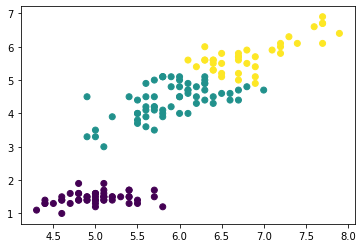

In [18]:
import matplotlib.pyplot as plt 
xs = samples[:,0]
ys = samples[:,2]
plt.scatter(xs, ys, c=labels) 
plt.show()